In [8]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 提取数据进行训练和测试
# 训练数据
train_images_part = train_images[:50000].reshape((50000, 28, 28, 1))
train_images_part = train_images_part.astype('float32') / 255
train_labels_part = train_labels[:50000]
print(train_images_part.shape)
# 验证数据
val_x = train_images[-10000:].reshape((10000, 28, 28, 1))
val_x = val_x.astype('float32') / 255
val_y = train_labels[-10000:]
print(val_x.shape)
# 测试数据
test_images_part = test_images[:10000].reshape((10000, 28 , 28, 1))
test_images_part = test_images_part.astype('float32') / 255
test_labels_part = test_labels[:10000]
print(test_labels_part.shape)


(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)


In [11]:
# 处理标签（对标签进行分类编码）
from keras.utils import to_categorical
train_labels_part = to_categorical(train_labels_part)
val_y = to_categorical(val_y)
print(val_y.shape)
test_labels_part = to_categorical(test_labels_part)
test_labels.shape

(10000, 10)


(10000,)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total para

In [14]:
batch_size = 128
epochs = 10
history = model.fit(train_images_part, 
                    train_labels_part, 
                    batch_size = batch_size, 
                    epochs=epochs, 
                    validation_data=(val_x, val_y))

test_loss, test_acc = model.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 15s 308us/step - loss: 0.2100 - acc: 0.9358 - val_loss: 0.0590 - val_acc: 0.9819
Epoch 2/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0612 - acc: 0.9815 - val_loss: 0.0547 - val_acc: 0.9836
Epoch 3/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0415 - acc: 0.9873 - val_loss: 0.0400 - val_acc: 0.9879
Epoch 4/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0333 - acc: 0.9895 - val_loss: 0.0434 - val_acc: 0.9876
Epoch 5/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0247 - acc: 0.9917 - val_loss: 0.0424 - val_acc: 0.9883
Epoch 6/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0209 - acc: 0.9933 - val_loss: 0.0393 - val_acc: 0.9894
Epoch 7/10
50000/50000 [==============================] - 14s 278us/step - loss: 0.0164 - acc: 0.9947 - val_loss: 0.

In [17]:
model.save('mnist_CNN.h5')

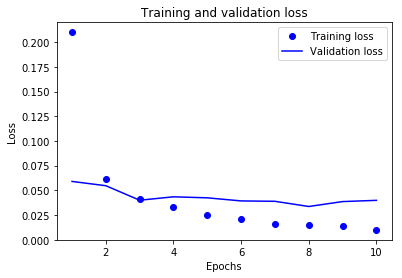

In [18]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()